# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Antonius Miquel Aureliano
- **Email:** antoniusmiquel.39@gmail.com
- **ID Dicoding:** antonius_miquel_bDY0

## Menentukan Pertanyaan Bisnis

- Apakah ada perubahan trend dalam jumlah penyewaan dari tahun 2011 hingga 2012?
- Seberapa besar pengaruh faktor temperatur dan feeling temperatur terhadap jumlah penyewaan sepeda?
- Apakah ada perbedaan signifikan dalam persewaan sepeda antara hari kerja (workingday) dan akhir pekan (weekend) atau hari libur (holiday)?
- Trend jam penyewaan sepeda dan korelasinya dengan workingday, weekend, atau holiday

## Import Semua Packages/Library yang Digunakan

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [84]:
# read daily dataset from csv 
dfDay = pd.read_csv('../projectAnalisaDataDicoding/data/day.csv')
dfDay.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [85]:
# read hourly dataset from csv
dfHour = pd.read_csv('../projectAnalisaDataDicoding/data/hour.csv')
dfHour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Combining Data and Cleaning Data
Since there is two dataset seperated by day and hour, we need to combine them into one dataset. To differentiate beteween the two dataset, we will add suffixes to the columns.

In [86]:
# combined dataset
dfCombined = dfDay.merge(dfHour, on='dteday', how='inner', suffixes=('_day', '_hour'))
dfCombined.head()

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Checking for:
- Missing Values
- Duplicates
- Data Types
- Outliers

In [87]:
# checking for missing values
print(dfCombined.isnull().sum())

instant_day        0
dteday             0
season_day         0
yr_day             0
mnth_day           0
holiday_day        0
weekday_day        0
workingday_day     0
weathersit_day     0
temp_day           0
atemp_day          0
hum_day            0
windspeed_day      0
casual_day         0
registered_day     0
cnt_day            0
instant_hour       0
season_hour        0
yr_hour            0
mnth_hour          0
hr                 0
holiday_hour       0
weekday_hour       0
workingday_hour    0
weathersit_hour    0
temp_hour          0
atemp_hour         0
hum_hour           0
windspeed_hour     0
casual_hour        0
registered_hour    0
cnt_hour           0
dtype: int64


As there are no missing values, we can move on to checking for duplicates.

In [88]:
# checking for duplicates
print(dfCombined.duplicated().sum())

0


There are no duplicates in the dataset. Next, we will check the data types of each column.

In [89]:
# checking data types
print(dfCombined.dtypes)

instant_day          int64
dteday              object
season_day           int64
yr_day               int64
mnth_day             int64
holiday_day          int64
weekday_day          int64
workingday_day       int64
weathersit_day       int64
temp_day           float64
atemp_day          float64
hum_day            float64
windspeed_day      float64
casual_day           int64
registered_day       int64
cnt_day              int64
instant_hour         int64
season_hour          int64
yr_hour              int64
mnth_hour            int64
hr                   int64
holiday_hour         int64
weekday_hour         int64
workingday_hour      int64
weathersit_hour      int64
temp_hour          float64
atemp_hour         float64
hum_hour           float64
windspeed_hour     float64
casual_hour          int64
registered_hour      int64
cnt_hour             int64
dtype: object


In [90]:
# checking for outliers
dfCombined.describe(include='all')

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,367.172622,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


We can see that the data types of the columns are mostly correct. However, the 'dteday' column is in object data type. We will change it to datetime data type. 

changing 'dteday' data type from object to datetime

In [91]:
# change 'dteday' data type to datetime
dfCombined['dteday'] = pd.to_datetime(dfCombined['dteday'])
print(dfCombined.dtypes)


instant_day                 int64
dteday             datetime64[ns]
season_day                  int64
yr_day                      int64
mnth_day                    int64
holiday_day                 int64
weekday_day                 int64
workingday_day              int64
weathersit_day              int64
temp_day                  float64
atemp_day                 float64
hum_day                   float64
windspeed_day             float64
casual_day                  int64
registered_day              int64
cnt_day                     int64
instant_hour                int64
season_hour                 int64
yr_hour                     int64
mnth_hour                   int64
hr                          int64
holiday_hour                int64
weekday_hour                int64
workingday_hour             int64
weathersit_hour             int64
temp_hour                 float64
atemp_hour                float64
hum_hour                  float64
windspeed_hour            float64
casual_hour   

In [92]:
# checking for outlier using iqr method
Q1 = dfCombined.quantile(0.25)
Q3 = dfCombined.quantile(0.75)
IQR = Q3 - Q1
cut_off = IQR * 1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
outliers = (dfCombined < lower) | (dfCombined > upper)
outliers.sum()


instant_day           0
dteday                0
season_day            0
yr_day                0
mnth_day              0
holiday_day         500
weekday_day           0
workingday_day        0
weathersit_day        0
temp_day              0
atemp_day             0
hum_day              46
windspeed_day       312
casual_day         1056
registered_day        0
cnt_day               0
instant_hour          0
season_hour           0
yr_hour               0
mnth_hour             0
hr                    0
holiday_hour        500
weekday_hour          0
workingday_hour       0
weathersit_hour       3
temp_hour             0
atemp_hour            0
hum_hour             22
windspeed_hour      342
casual_hour        1192
registered_hour     680
cnt_hour            505
dtype: int64

unfortunately, there are multiple outliers in the dataset. After checking the data manually, it seems that the outliers are not errors. so we will not remove the outliers.

## Exploratory Data Analysis (EDA), Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada perubahan trend dalam jumlah penyewaan dari tahun 2011 hingga 2012?

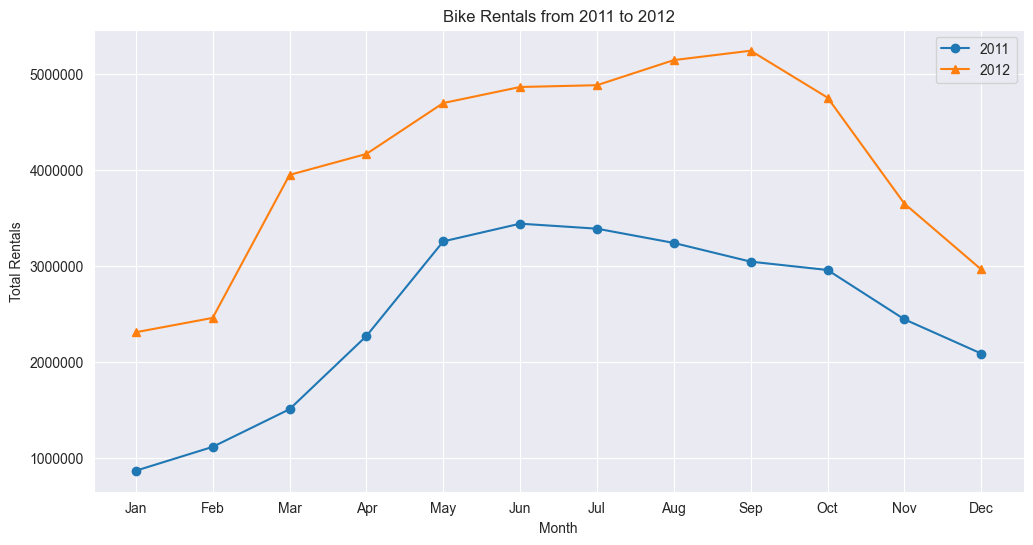

In [93]:
# exploring the trend of bike rental from 2011 to 2012

# split the dataset into two, 2011 and 2012
df2011 = dfCombined[dfCombined['dteday'].dt.year == 2011]
df2012 = dfCombined[dfCombined['dteday'].dt.year == 2012]

# group the data by month
rentals_2011 = df2011.groupby('mnth_day')['cnt_day'].sum()
rentals_2012 = df2012.groupby('mnth_day')['cnt_day'].sum()

# plot the data
plt.figure(figsize=(12, 6))
plt.plot(rentals_2011, label='2011', marker='o')
plt.plot(rentals_2012, label='2012', marker='^')
plt.title('Bike Rentals from 2011 to 2012')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ticklabel_format(style='plain', axis='y')  # disable scientific notation
plt.legend()
plt.show()


From the plot, we can see that there is a significant increase in bike rentals from 2011 to 2012. The increase is most significant from June to September.

### Pertanyaan 2: Seberapa besar pengaruh faktor temperatur dan feeling temperatur terhadap jumlah penyewaan sepeda per jam?

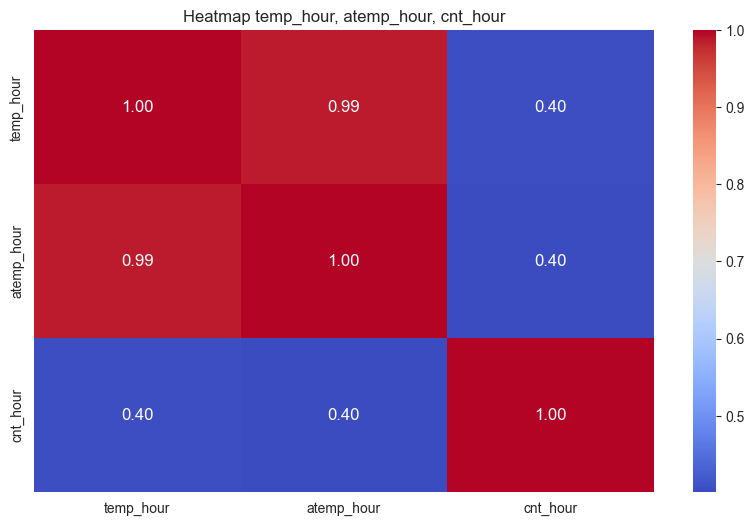

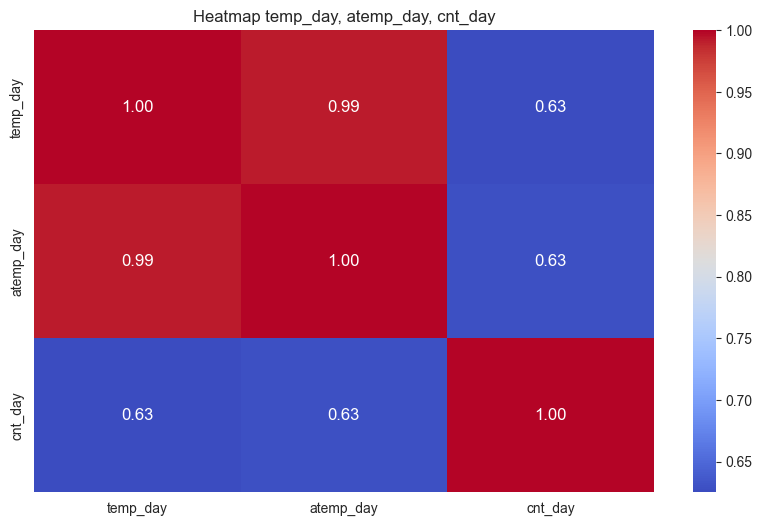

In [94]:
heatmap_data_hour = dfCombined[['temp_hour', 'atemp_hour', 'cnt_hour']]
heatmap_data_day = dfCombined[['temp_day', 'atemp_day', 'cnt_day']]

# Buat heatmap untuk level jam
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_hour.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Heatmap temp_hour, atemp_hour, cnt_hour')
plt.show()

# Buat heatmap untuk level hari
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_day.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Heatmap temp_day, atemp_day, cnt_day')
plt.show()

From the heatmap, we can see that the temperature and feeling temperature have a positive correlation with the number of bike rentals. The correlation is stronger for the hourly dataset compared to the daily dataset.

### Pertanyaan 3: Apakah ada perbedaan signifikan dalam persewaan sepeda antara hari kerja (workingday) dan akhir pekan (weekend) atau hari libur (holiday)?

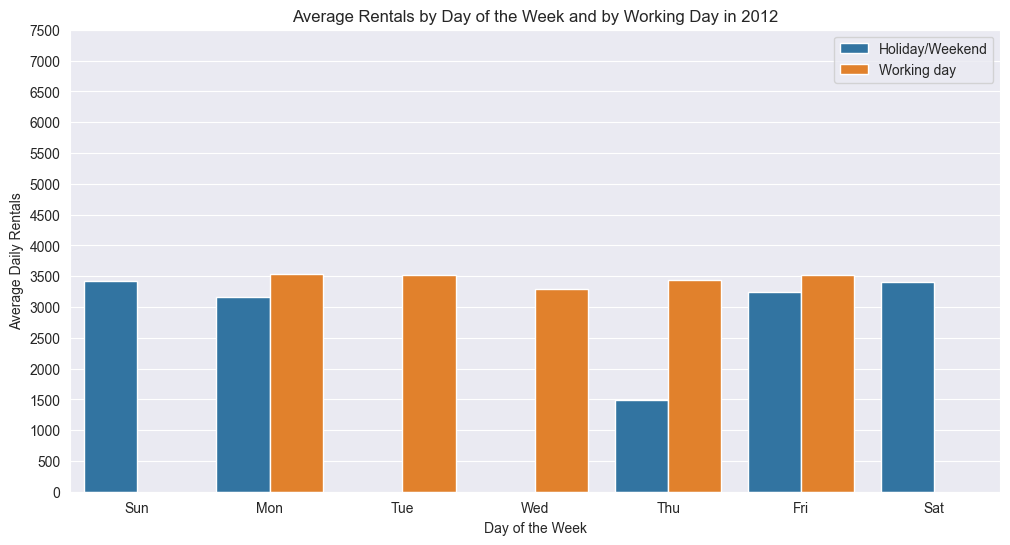

In [95]:
rentals_by_day2011 = df2011.groupby(['workingday_day','weekday_day', 'holiday_day'])['cnt_day'].mean()
rentals_by_day2011 = rentals_by_day2011.reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=rentals_by_day2011, x='weekday_day', y='cnt_day', hue='workingday_day')
plt.legend(title='Day type')
handles, labels = ax.get_legend_handles_labels() # get current handles and labels
new_labels = ['Holiday/Weekend', 'Working day'] # new labels
plt.legend(handles=handles, labels=new_labels) # set new labels due to the hue parameter
plt.title('Average Rentals by Day of the Week and by Working Day in 2012')
plt.xlabel('Day of the Week')
plt.ylabel('Average Daily Rentals')
plt.xticks(np.arange(0, 7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.yticks(np.arange(0, 8000, 500))
plt.show()

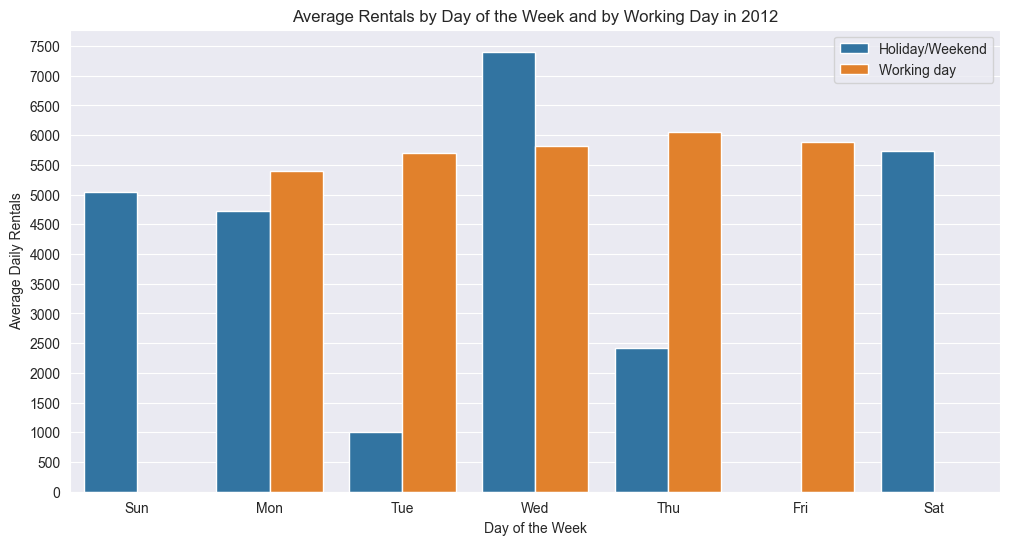

In [96]:
rentals_by_day2012 = df2012.groupby(['workingday_day','weekday_day', 'holiday_day'])['cnt_day'].mean()
rentals_by_day2012 = rentals_by_day2012.reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=rentals_by_day2012, x='weekday_day', y='cnt_day', hue='workingday_day')
plt.legend(title='Day type')
handles, labels = ax.get_legend_handles_labels() # get current handles and labels
new_labels = ['Holiday/Weekend', 'Working day'] # new labels
plt.legend(handles=handles, labels=new_labels) # set new labels due to the hue parameter
plt.title('Average Rentals by Day of the Week and by Working Day in 2012')
plt.xlabel('Day of the Week')
plt.ylabel('Average Daily Rentals')
plt.xticks(np.arange(0, 7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.yticks(np.arange(0, 8000, 500))
plt.show()



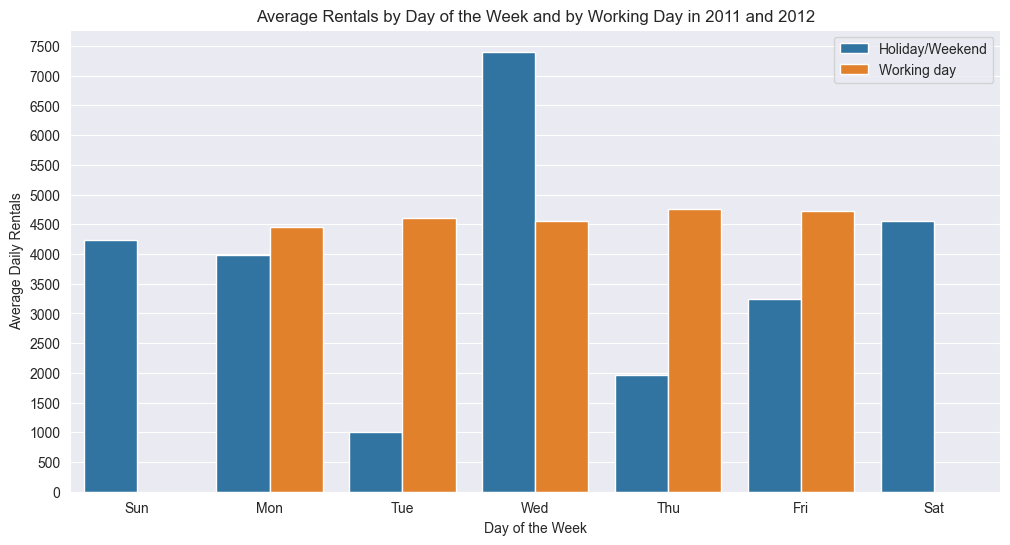

In [97]:
rentals_by_day = dfCombined.groupby(['workingday_day','weekday_day', 'holiday_day'])['cnt_day'].mean()
rentals_by_day = rentals_by_day.reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=rentals_by_day, x='weekday_day', y='cnt_day', hue='workingday_day')
plt.legend(title='Day type')
handles, labels = ax.get_legend_handles_labels() # get current handles and labels
new_labels = ['Holiday/Weekend', 'Working day'] # new labels
plt.legend(handles=handles, labels=new_labels) # set new labels due to the hue parameter
plt.title('Average Rentals by Day of the Week and by Working Day in 2011 and 2012')
plt.xlabel('Day of the Week')
plt.ylabel('Average Daily Rentals')
plt.xticks(np.arange(0, 7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.yticks(np.arange(0, 8000, 500))
plt.show()

 In 2011, there are no significant differences in the average number of bike rentals between working days and holidays/weekends. However, in 2012, the average number of bike rentals is higher on holidays and weekends compared to working days. From the combined bar plot, we can see that there is a significant difference in the average number of bike rentals between working days and holidays/weekends. The average number of bike rentals is higher on holidays and weekends compared to working days.

### Pertanyaan 4: Trend jam penyewaan sepeda dan korelasinya dengan workingday, weekend, atau holiday

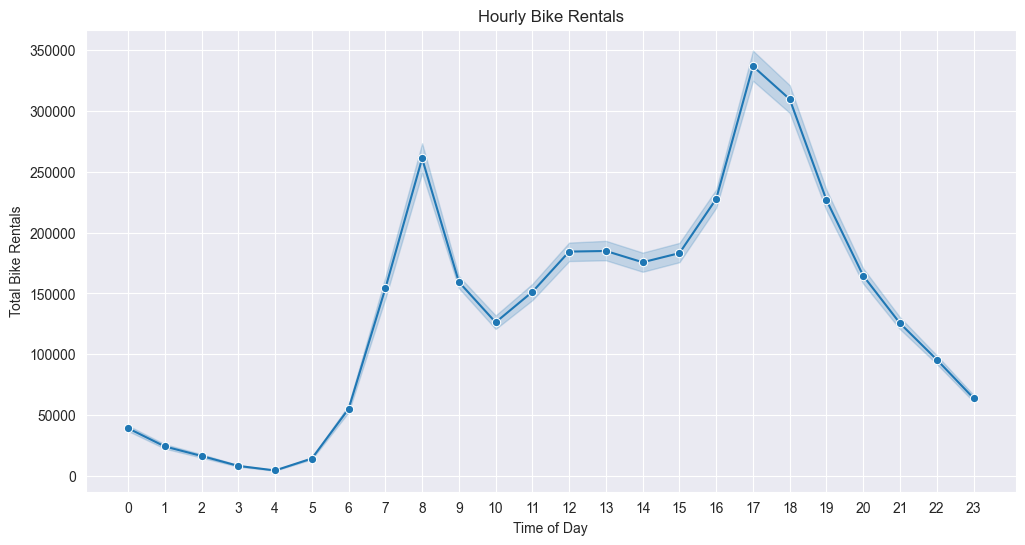

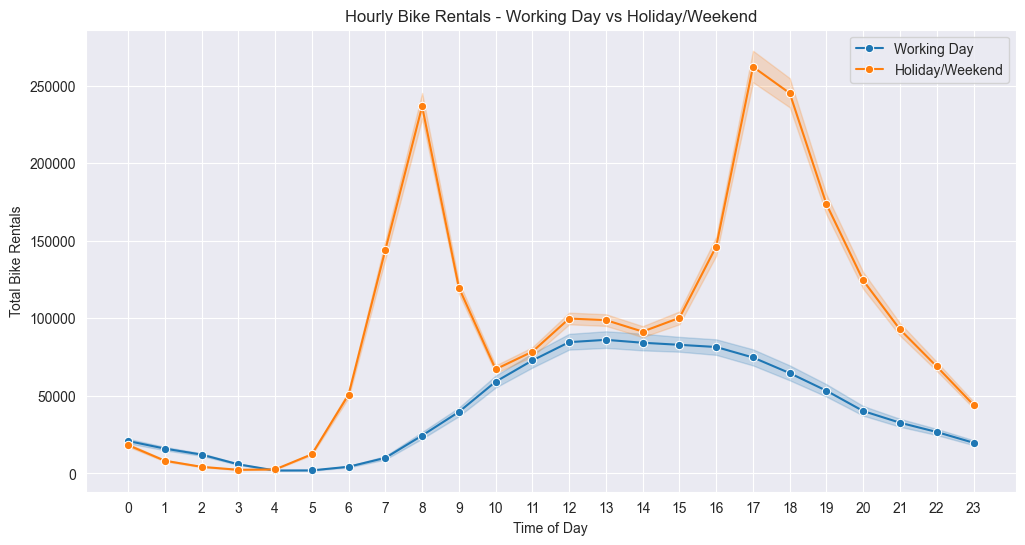

In [98]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfCombined, x='hr', y='cnt_hour', estimator='sum', marker='o')
plt.title('Hourly Bike Rentals')
plt.xlabel('Time of Day')
plt.ylabel('Total Bike Rentals')
plt.xticks(np.arange(0, 24))
plt.grid(True)
plt.show()

# Segmentasi data
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=dfCombined, x='hr', y='cnt_hour', hue='workingday_hour', estimator='sum', marker='o')
plt.legend(title='Day type')
handles, labels = ax.get_legend_handles_labels() # get current handles and labels
new_labels = ['Working Day', 'Holiday/Weekend'] # new labels
plt.legend(handles=handles, labels=new_labels) # set new labels due to the hue parameter
plt.title('Hourly Bike Rentals - Working Day vs Holiday/Weekend')
plt.xlabel('Time of Day')
plt.ylabel('Total Bike Rentals')
plt.xticks(np.arange(0, 24))
plt.grid(True)
plt.show()

From the first plot, we can see that the trend of bike rentals is bimodal. The number of bike rentals is highest in the morning and in the evening. From the second plot, we can see that the trend of bike rentals is different between working days and holidays/weekends. On working days, the number of bike rentals is highest in the morning and in the evening. On holidays/weekends, the number of bike rentals is highest in the afternoon.

## Conclusion

- There is a significant increase in bike rentals from 2011 to 2012. The increase is most significant from June to September.
- The temperature and feeling temperature have a positive correlation with the number of bike rentals. The correlation is stronger for the hourly dataset compared to the daily dataset.
- In 2011, there are no significant differences in the average number of bike rentals between working days and holidays/weekends. However, in 2012, the average number of bike rentals is higher on holidays and weekends compared to working days. 
- The number of bike rentals is highest in the morning and in the evening.  On holidays/weekends, the number of bike rentals is highest in the afternoon.

In [99]:
# export to csv for dashboard
# export_csv = dfCombined.to_csv (r'dashboard\combined_data.csv', index = None, header=True) 
